# Introduction

# Preliminary EDA

### Import Libraries

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
require(vtable)

Loading required package: vtable

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘vtable’”


### Downloading & Reading File

In [3]:
file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip"
zip = download.file(file_url, "audit.zip")
unzipped = unzip("audit.zip")

audit_data = read_csv("audit_data/audit_risk.csv")
head(audit_data)
colnames(audit_data)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0


[1] "Sector_score"   "LOCATION_ID"    "PARA_A"         "Score_A"       
 [5] "Risk_A"         "PARA_B"         "Score_B...7"    "Risk_B"        
 [9] "TOTAL"          "numbers"        "Score_B...11"   "Risk_C"        
[13] "Money_Value"    "Score_MV"       "Risk_D"         "District_Loss" 
[17] "PROB"           "RiSk_E"         "History"        "Prob"          
[21] "Risk_F"         "Score"          "Inherent_Risk"  "CONTROL_RISK"  
[25] "Detection_Risk" "Audit_Risk"     "Risk"

### Wrangling & Cleaning

Looking at the data, it seems like it is tidy already and column types are well defined. The column names are inconsistent with case so we'll standardize it by uppercasing everything. The risk column is going to be our target class, therefore we will also change the type from dbl to factor.

In [4]:
colnames(audit_data) = toupper(colnames(audit_data))

Before changing the risk column to factor and examining the dataset, let's investigate the meaning of each column and see if any should be removed. Note that we have a conflict in column names right now: there are two columns named PROB.
Source: https://www.researchgate.net/publication/323655455_Fraudulent_Firm_Classification_A_Case_Study_of_an_External_Audit, https://www.kaggle.com/datasets/sid321axn/audit-data.

- <b>SECTOR_SCORE</b>: Historical risk score value of sector
- <b>LOCATION_ID</b>: Unique ID of the city/province
- <b>PARA_A</b>: Discrepancy found in the planned expenditure of inspection and summary report A in crore
- <b>SCORE_A</b>: Unknown
- <b>RISK_A</b>:  Unknown
- <b>PARA_B</b>: Discrepancy found in the planned expenditure of inspection and summary report A in crore
- <b>SCORE_B...7</b>: Unknown
- <b>RISK_B</b>: Unknown
- <b>TOTAL</b>: Total amount of discrepancy found in other reports in crore
- <b>NUMBERS</b>: Historical discrepancy score
- <b>SCORE_B...11</b>: Unknown
- <b>RISK_C</b>: Unknown
- <b>MONEY_VALUE</b>: Amount of money involved in misstatements in the past audits
- <b>SCORE_MV</b>: Unknown
- <b>RISK_D</b>: Unknown
- <b>DISTRICT_LOSS</b>: Unknown
- <b>PROB</b>: Unknown
- <b>RISK_E</b>: Unknown
- <b>HISTORY</b>: Unknown
- <b>PROB</b>: Unknown
- <b>RISK_F</b>: Unknown
- <b>SCORE</b>: Unknown
- <b>INHERENT_RISK</b>: Unknown
- <b>CONTROL_RISK</b>: Unknown
- <b>DETECTION_RISK</b>: Unknown
- <b>AUDIT_RISK</b>: Total risk score using analytical procedure, used to determine the risk class (class 0 if <= 1). Feature Engineered
- <b>RISK</b>: Target class (risk class)

Note that there are a lot of columns that we are not sure what they mean! Some of these columns seems to be generated through feature extraction or audit risk assessment based on the "Fraudulent Firm Classification A Case Study of an External Audit". Since, we do not have the domain knowledge, we will be dropping these features. In addition, we will also drop the audit risk score as it is the score used to determine the target(risk class) of the firms.

In [5]:
audit_data_filtered = audit_data |> select(SECTOR_SCORE, LOCATION_ID, PARA_A, PARA_B, TOTAL, NUMBERS, MONEY_VALUE, RISK)

Now that the conflicting columns (2 PROB columns) are dropped, we can change the type of the RISK column to factor.

In [6]:
audit_data_filtered = audit_data_filtered |> mutate(RISK = as_factor(RISK))
head(audit_data_filtered)

SECTOR_SCORE,LOCATION_ID,PARA_A,PARA_B,TOTAL,NUMBERS,MONEY_VALUE,RISK
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,2.50,6.68,5,3.38,1
3.89,6,0.00,4.83,4.83,5,0.94,0
3.89,6,0.51,0.23,0.74,5,0.00,0
3.89,6,0.00,10.80,10.80,6,11.75,1
3.89,6,0.00,0.08,0.08,5,0.00,0
3.89,6,0.00,0.83,0.83,5,2.95,0


### Filtered Data Summary

In [7]:
num_firms = nrow(audit_data_filtered)
num_firms

[1] 776

There are 776 firms.

In [8]:
count_by_class = audit_data_filtered |>
    group_by(RISK) |>
    summarize(count=n(), percentage=n()/num_firms * 100)
count_by_class

RISK,count,percentage
<fct>,<int>,<dbl>
0,471,60.69588
1,305,39.30412


There are 471 firms classified as non fraud and 305 firms classified as fraud. A bit of class imbalance.

In [9]:
table.summary <- function(x){
  c(Mean=mean(x, na.rm=TRUE),
    SD=sd(x, na.rm=TRUE),
    Median=median(x, na.rm=TRUE),
    Min=min(x, na.rm=TRUE),
    Max=max(x, na.rm=TRUE),
    Unique=n_distinct(x, na.rm=TRUE),
    Missing=sum(is.na(x)))
}
# Function creation referenced https://stackoverflow.com/questions/20997380/creating-a-summary-statistical-table-from-a-data-frame by Jilber Urbina

apply(select(audit_data_filtered, -RISK, -LOCATION_ID), 2, table.summary)

,SECTOR_SCORE,PARA_A,PARA_B,TOTAL,NUMBERS,MONEY_VALUE
Mean,20.18454,2.450194,10.79999,13.21848,5.0676546,14.13763
SD,24.31902,5.678870,50.08362,51.31283,0.2644486,66.60652
Median,3.89000,0.875000,0.40500,1.37000,5.0000000,0.09000
Min,1.85000,0.000000,0.00000,0.00000,5.0000000,0.00000
Max,59.85000,85.000000,1264.63000,1268.91000,9.0000000,935.03000
Unique,13.00000,363.000000,358.00000,471.00000,5.0000000,328.00000
Missing,0.00000,0.000000,0.00000,0.00000,0.0000000,1.00000


The values for each feature are pretty differently scaled and have separate ranges. MONEY_VALUE has one missing value. It seems odd that history only have 7 unique values as it should represent historical 

In [10]:
n_distinct(select(audit_data_filtered, LOCATION_ID))

[1] 45

There are 45 distinct locations in this dataset

### Visualization

Let's look at the distribution of firms across location.

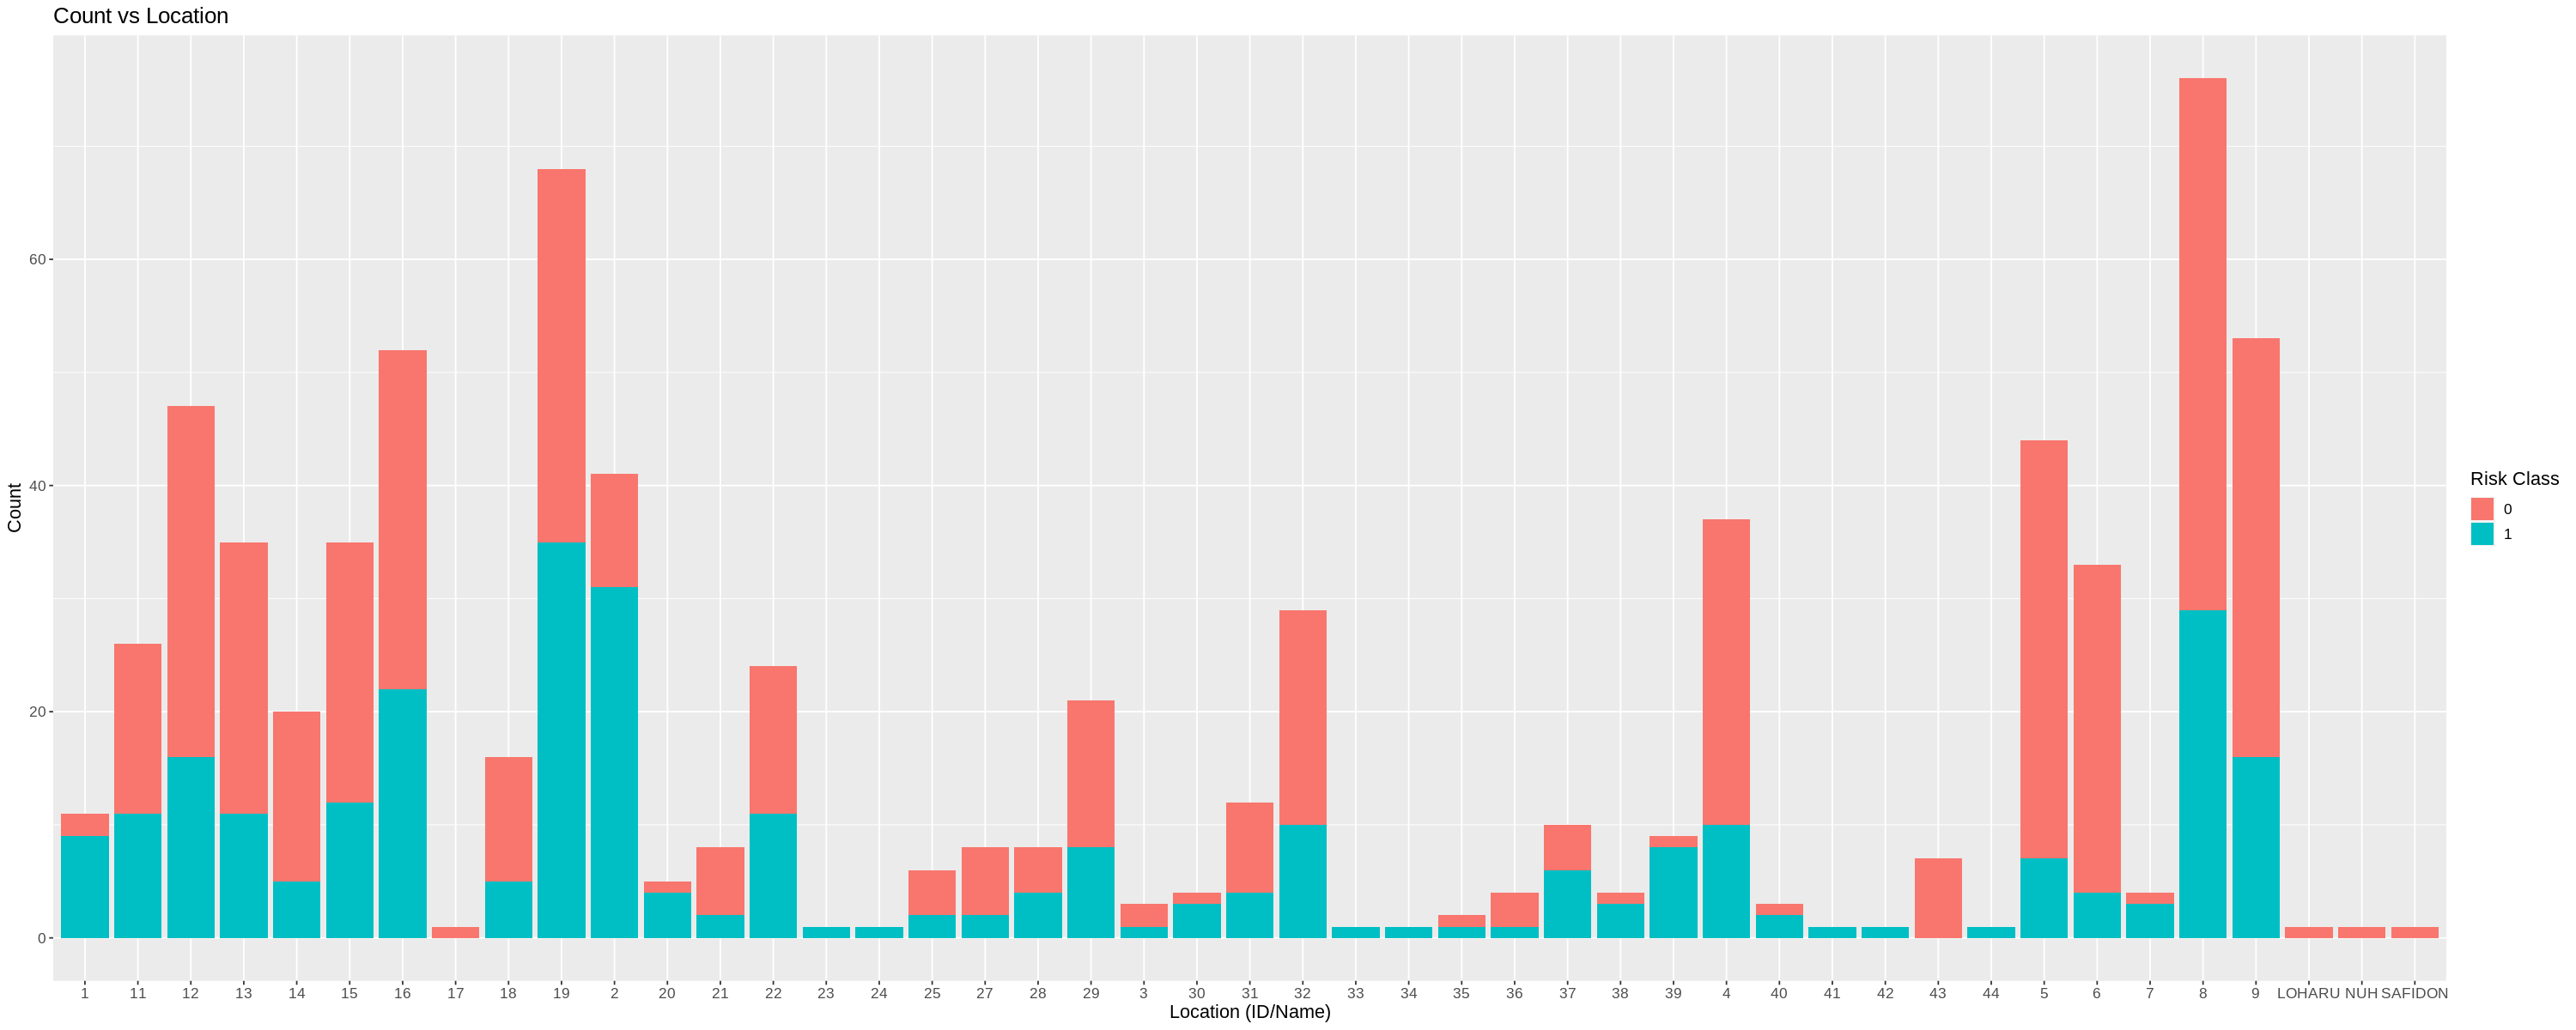

In [11]:
options(repr.plot.width = 25, repr.plot.height = 10) 
location_plot = audit_data_filtered |> 
    ggplot(aes(x=LOCATION_ID, fill=RISK)) +
        geom_bar() +
        labs(x="Location (ID/Name)", y="Count", fill="Risk Class", title="Count vs Location") +
        theme(text = element_text(size = 13))
location_plot

There is an imbalance of examples for each location, some locations have very few data. By intuition location of the firm should not effect the risk. We will drop the location column.

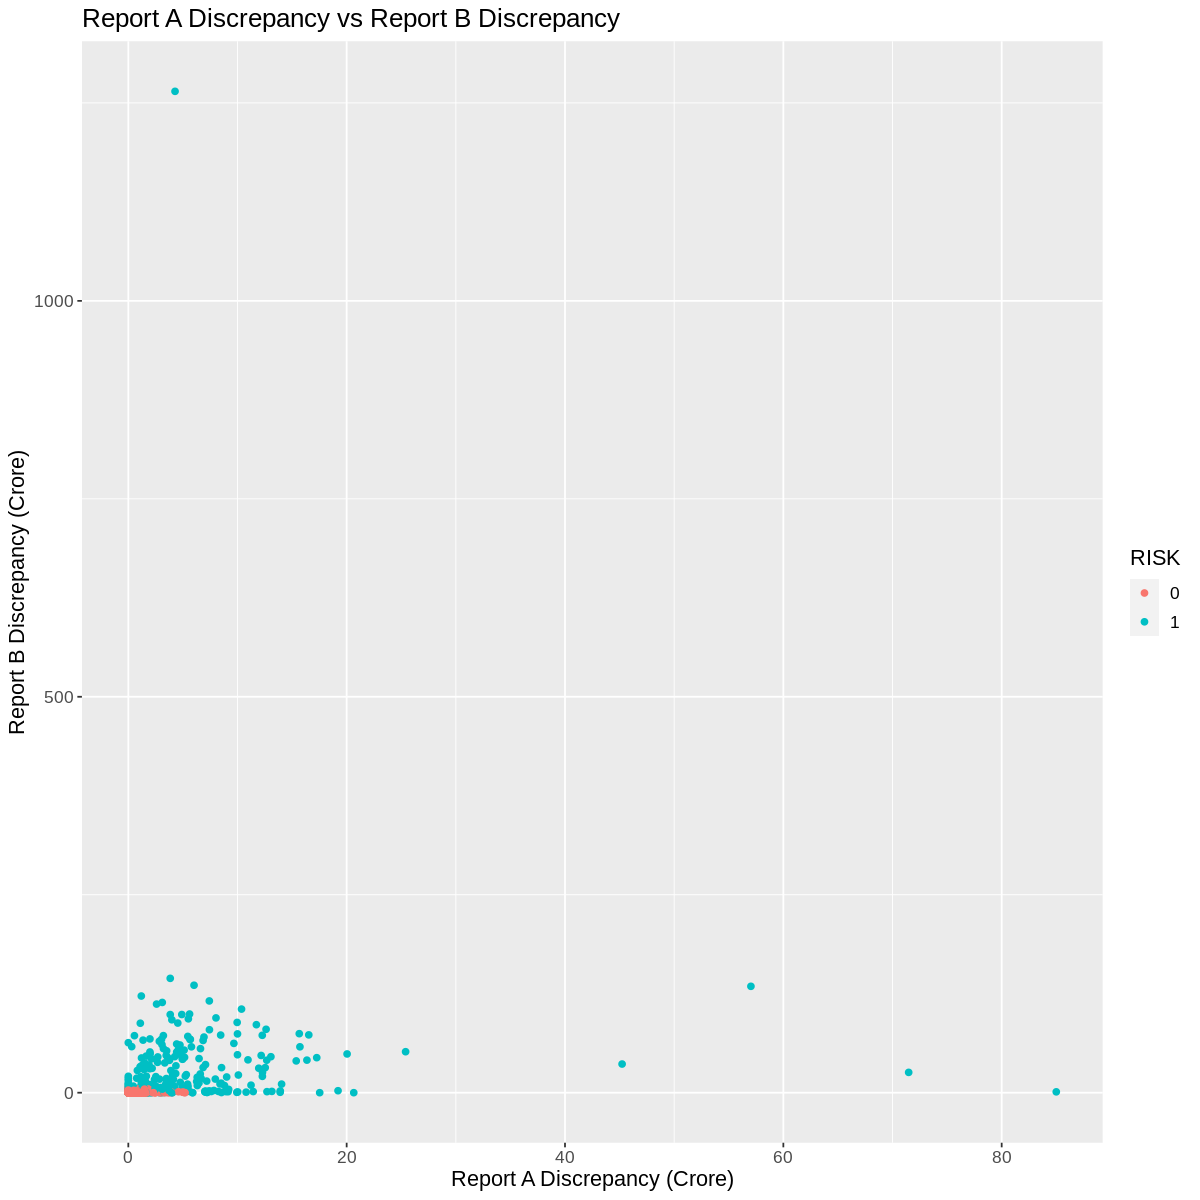

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10) 
pab_plot = audit_data_filtered |> 
    ggplot(aes(x=PARA_A, y=PARA_B, color=RISK)) +
        geom_point() +
        labs(x="Report A Discrepancy (Crore)", y="Report B Discrepancy (Crore)", fill="Risk Class", title="Report A Discrepancy vs Report B Discrepancy") +
        theme(text = element_text(size = 13))
pab_plot

There seems to be some outliers for both discrepancies. These outliers all have risk class of 1. 
Let's filter out these outliers and take a closer look at points close to (0, 0)

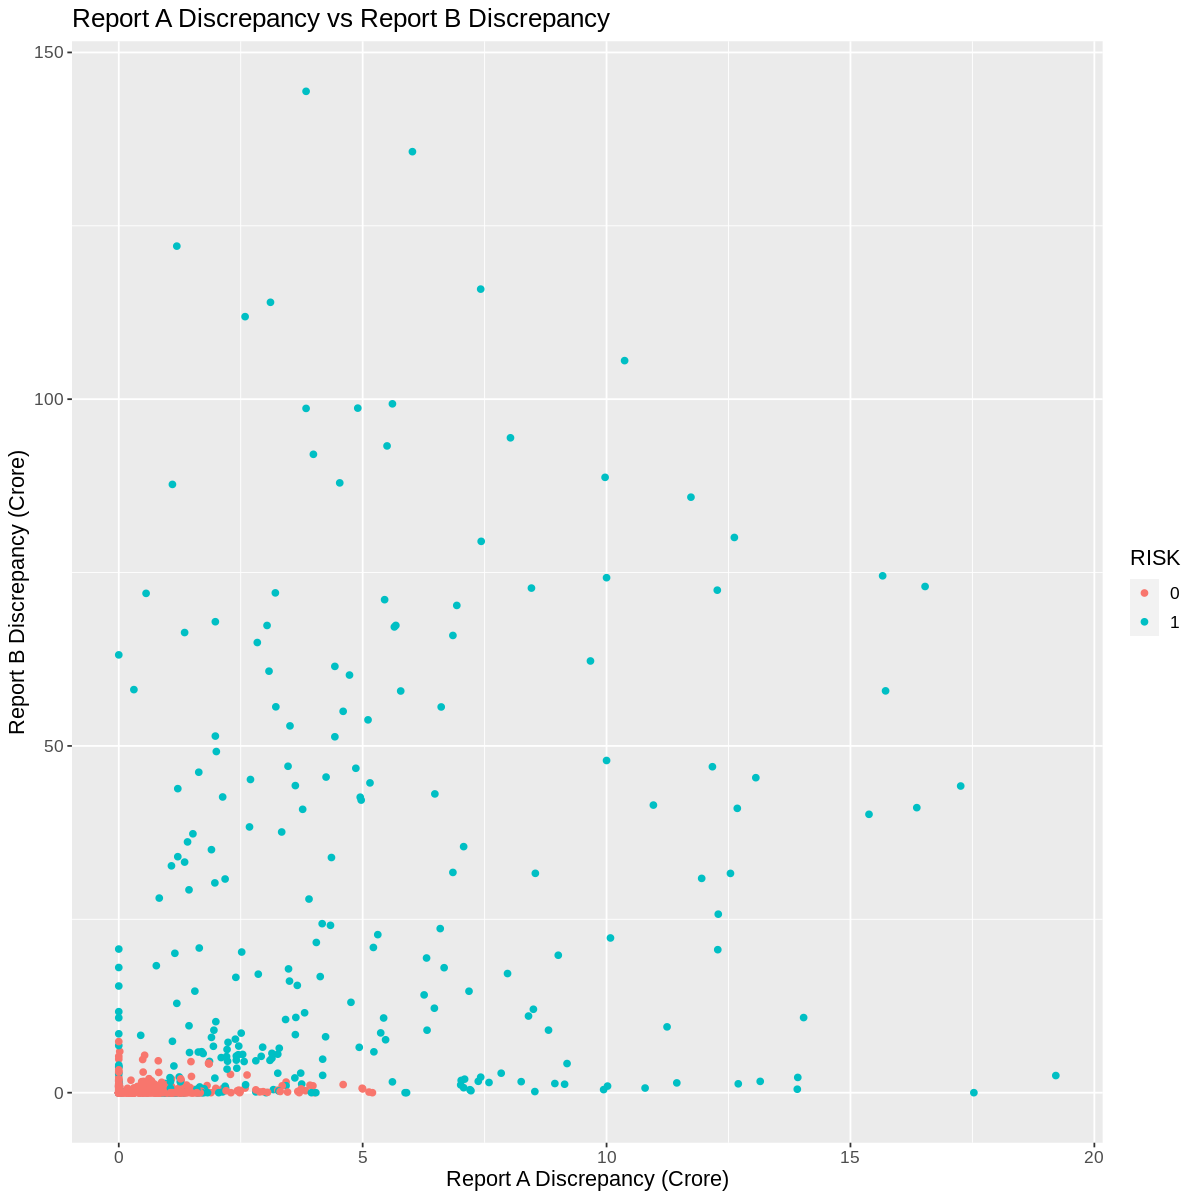

In [13]:
pab_plot = audit_data_filtered |>
    filter(PARA_A <= 20 & PARA_B <= 250) |>
    ggplot(aes(x=PARA_A, y=PARA_B, color=RISK)) +
        geom_point() +
        labs(x="Report A Discrepancy (Crore)", y="Report B Discrepancy (Crore)", fill="Risk Class", title="Report A Discrepancy vs Report B Discrepancy") +
        theme(text = element_text(size = 13))
pab_plot

It seems like firms with high discrepancy in A or B are likely to be classified as fraud. Let's visualize the total discrepancy and see if it is similar. Again, let's filter out the outliers.

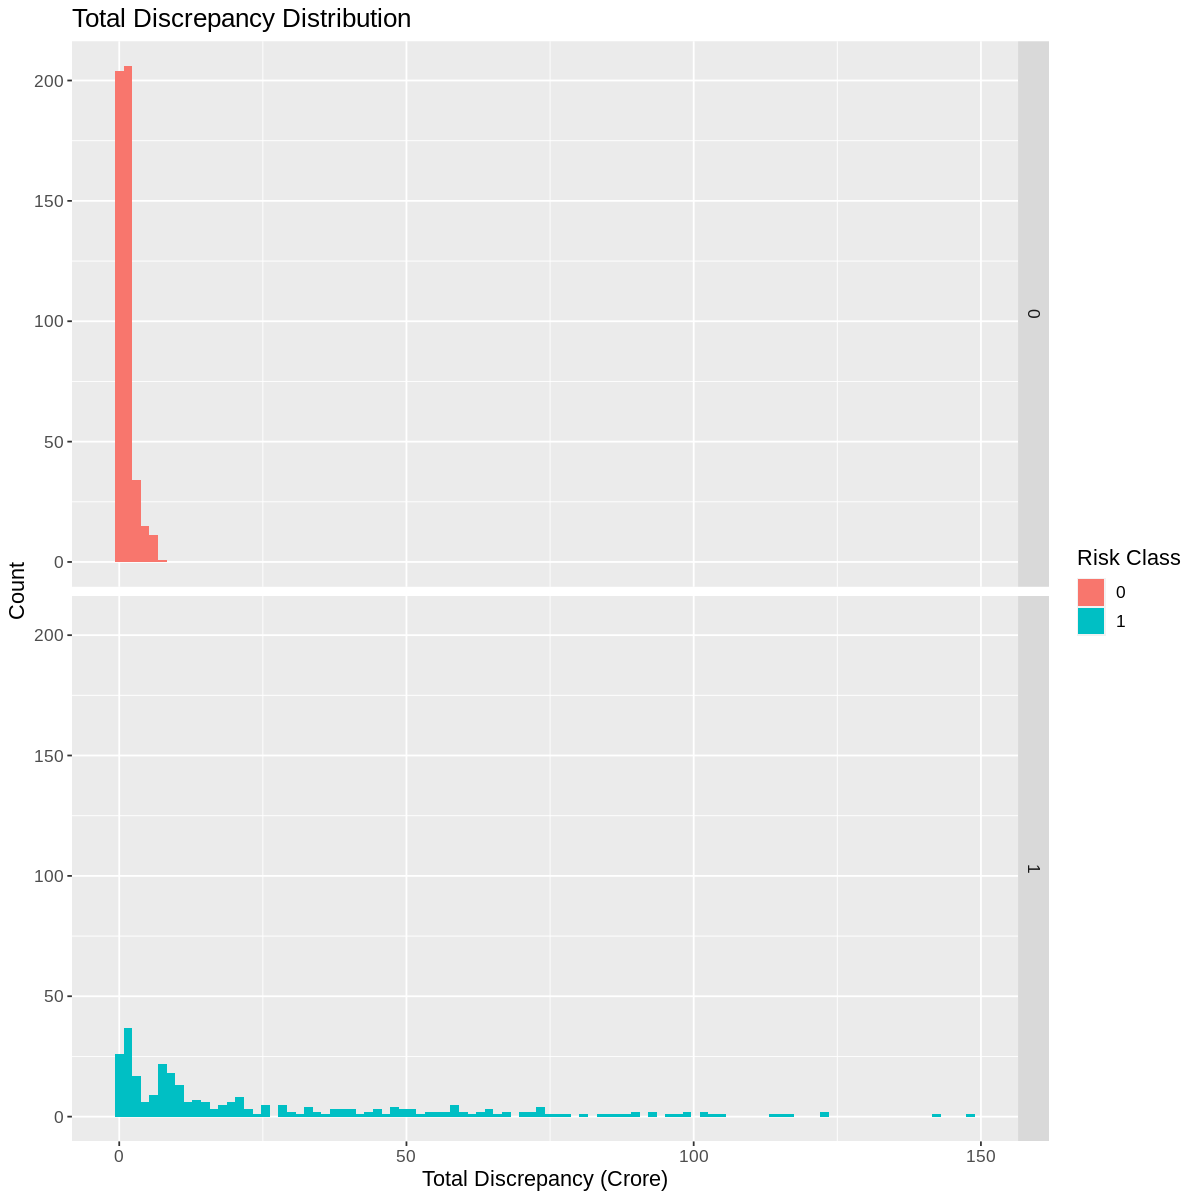

In [14]:
total_disc_plot = audit_data_filtered |>
    filter(PARA_A <= 20 & PARA_B <= 250) |>
    ggplot(aes(x=TOTAL, fill=RISK)) +
        geom_histogram(bins=100) +
        facet_grid(rows = vars(RISK)) +
        labs(x="Total Discrepancy (Crore)", y="Count", fill="Risk Class", title="Total Discrepancy Distribution") +
        theme(text = element_text(size = 13))
total_disc_plot

Firms with lower total discrepancy are more likely to be not fraud. What about money value and numbers (historical discrepancy score)?

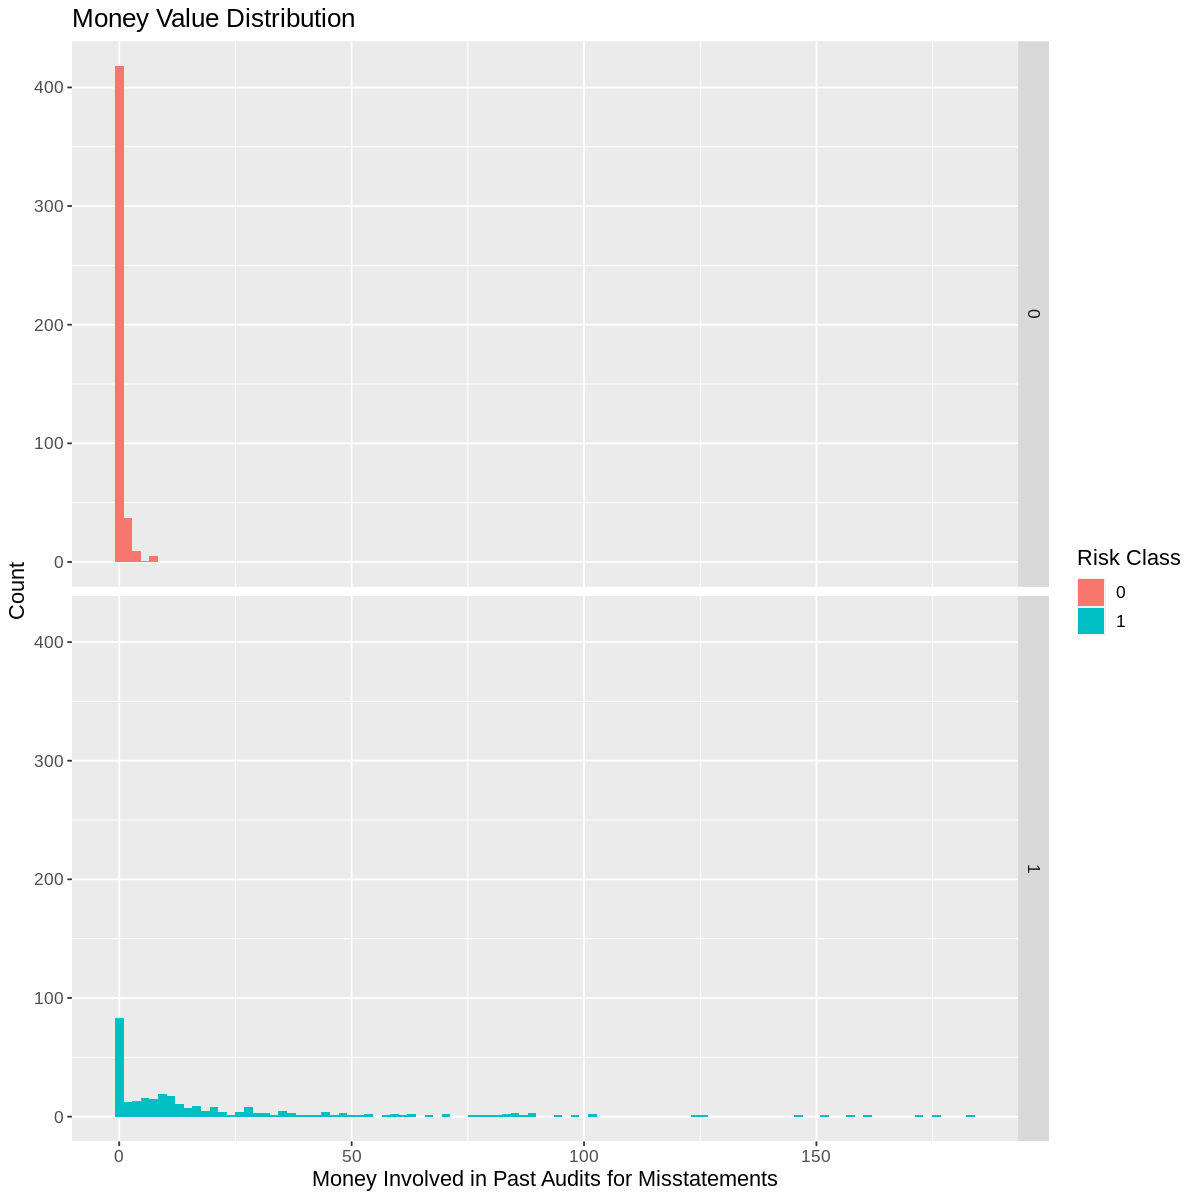

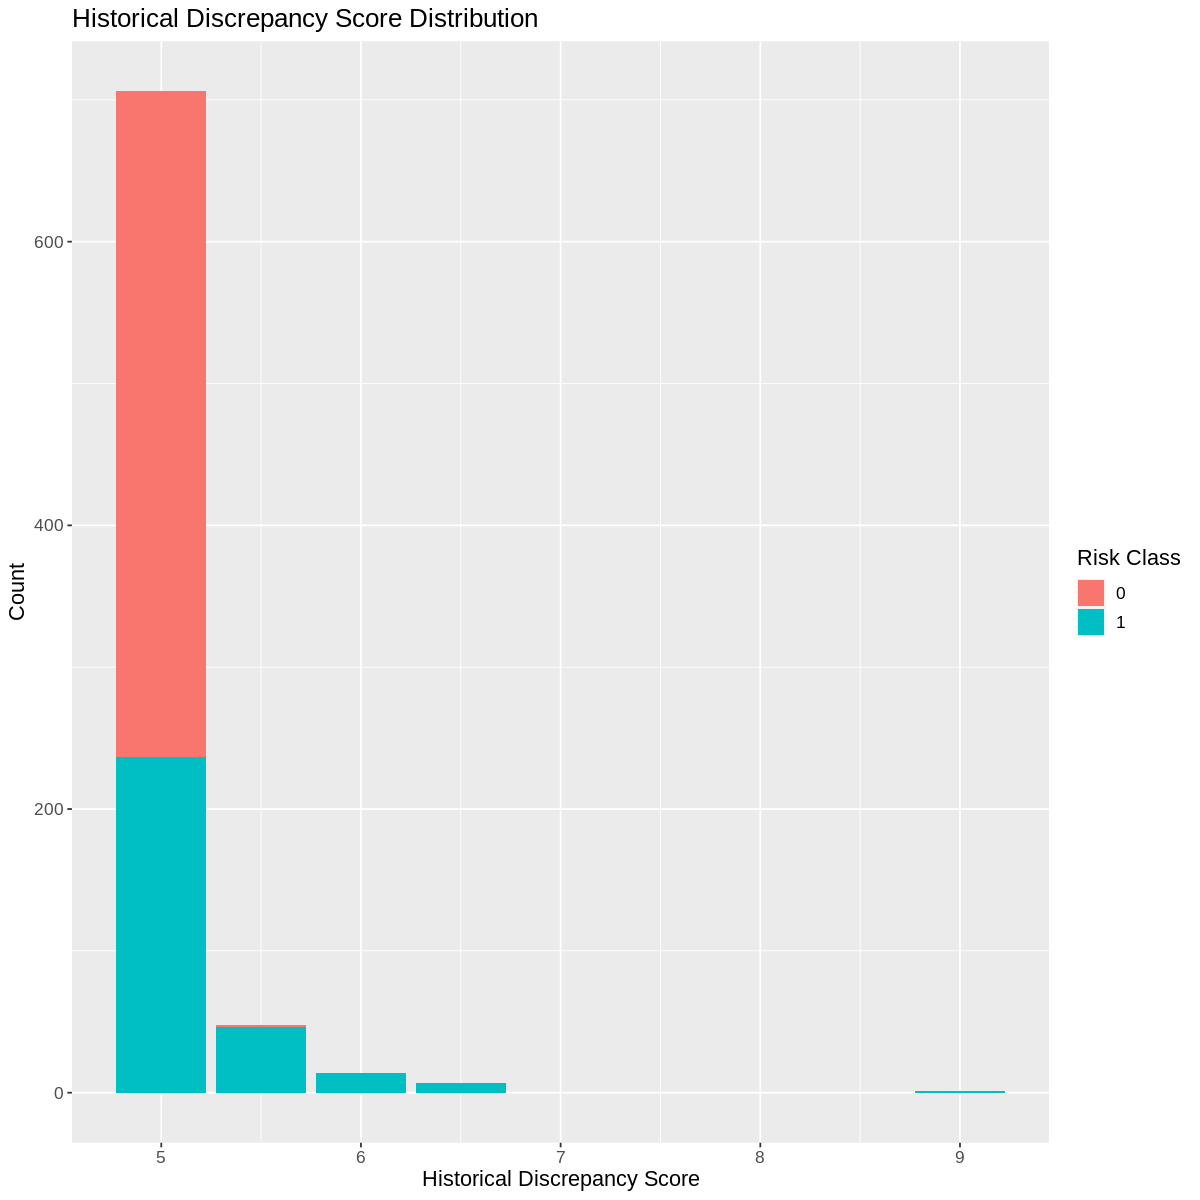

In [16]:
money_value_plot = audit_data_filtered |>
    filter(MONEY_VALUE <= 200) |>
    ggplot(aes(x=MONEY_VALUE, fill=RISK)) +
        geom_histogram(bins=100) +
        facet_grid(rows = vars(RISK)) +
        labs(x="Money Involved in Past Audits for Misstatements", y="Count", fill="Risk Class", title="Money Value Distribution") +
        theme(text = element_text(size = 13))

numbers_plot = audit_data_filtered |>
        ggplot(aes(x=NUMBERS, fill=RISK)) +
        geom_bar() +
        labs(x="Historical Discrepancy Score", y="Count", fill="Risk Class", title="Historical Discrepancy Score Distribution") +
        theme(text = element_text(size = 13))
money_value_plot
numbers_plot

Firms with high historical discrepancy score are likely to be fraud. Firm that had a lot of money involved in past audits for misstatements are also likely to be fraud.

# Methods

Note: for now keep SECTOR_SCORE, PARA_A, PARA_B, TOTAL, NUMBERS, MONEY_VAUE for prediction.

# Expected Outcomes And Significance